# Project 2 by Randy Leon

Introduction: My data set contains reported crimes that occurred between December 31st, 2015 and December 30th, 2016 in the U.S. city of San Francisco.

I recently visited San Francisco on a business trip and thought it was a lovely city, however, I'm always a little anxious visiting a new place. I stumbled upon this crime data to see what a typical year of crimes looks like in San Fran.

The research question that I hope to answer is a two part one. "When would be when is the safest time to visit SF?" as well as "What is the safest region in SF?"

I will define "safe" as absence of crime present. The more crime in a certain area of the city or time of day, the less safe those settings are.

In [1]:
##importing all of my tools necessary for the project.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##I found a dataset that meets the requirements 
filename = "/Users/RandyLeon/Desktop/Police_Department_Incidents_-_Previous_Year__2016_.csv"
SanFranCrime = pd.read_csv(filename)

In [2]:
##sanity check to see if my data was able to be uploaded.
SanFranCrime.head(n=5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Data Summary:

This dataset was acquired from the very famous kaggle.com - an online home/community of data scientists all sharing datasets with one another owned by Google. Coincidentally, Kaggle's HQ is based in San Francisco.

We can find out how many cases are in my dataset with a simple "shape" function.

In [3]:
## shape function will tell me how many rows, columns
SanFranCrime.shape

(150500, 13)

In [4]:
#printing all of the column names in this dataset
for col in SanFranCrime.columns: 
    print(col)

IncidntNum
Category
Descript
DayOfWeek
Date
Time
PdDistrict
Resolution
Address
X
Y
Location
PdId


The attributes can be categorized by the following datatypes:

IncidntNum - discrete numerical // 
Category - regular categorical // 
Descript - regular categorical // 
DayOfWeek - ordinal categorical // 
Date - ordinal categorical // 
Time - ordinal categorical // 
PdDistrict - regular categorical // 
Resolution - regular categorical // 
Address - regular categorical // 
X - discrete numerical // 
Y - discrete numerical  // 
Location - discrete numerical // 
PdId - ordinal categorical // 

Exploratory Data Analysis: Provide summary statistics for each attribute; provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings.

I believe it will be important to only visualize certain attributes to determine where and when it is the safest to be in San Francisco.

In [5]:
##checking to see if all incidents have unique codes.
SanFranCrime['IncidntNum'].count()

##since we resulted with the name number as when we intiated the shape function, there is no need for summary statistics
##for this attribute since each incident code is unique.

150500

In [6]:
##checking to see how many different kinds of categories there are.
SanFranCrime.Category.unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [31]:
#Larceny is the most common crime category
SanFranCrime['Category'].describe()

count            150500
unique               39
top       LARCENY/THEFT
freq              40409
Name: Category, dtype: object

In [33]:
#Grand Theft Auto is the most common crime in San Francisco. Makes up about 11% of all crimes.
SanFranCrime['Descript'].describe()

count                           150500
unique                             726
top       GRAND THEFT FROM LOCKED AUTO
freq                             17741
Name: Descript, dtype: object

In [34]:
SanFranCrime['Location'].describe()
##I found this location to be Bryant St in San Francisco. These coordinates came up roughly 3500 times.

count                                   150500
unique                                   19386
top       (37.775420706711, -122.403404791479)
freq                                      3536
Name: Location, dtype: object

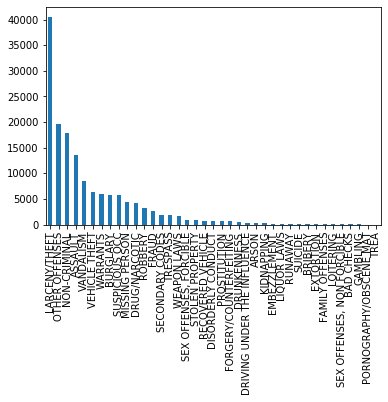

In [7]:
##matplotlib visualization for count of category of crimes in the city.
SanFranCrime['Category'].value_counts().plot(kind='bar');

Here we see that the five most common Categories of Crime in San Francisco are Larceny/Theft, Other Offenses, Non Criminal, Assault, and Vandalism.

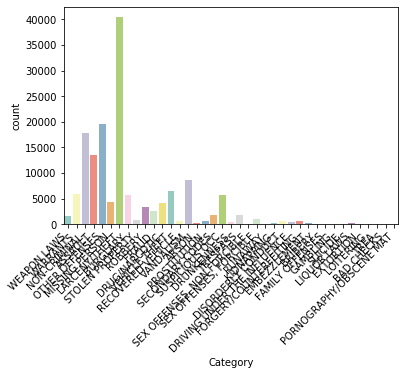

In [8]:
#Seaborn visualization for frequencies of categories of crime in the city.
ax = sns.countplot(x="Category", data=SanFranCrime, palette="Set3");

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

Here we can we the same results, albeit a little messier, shown as a seaborn countplot.

Doing visualizations for descriptions of crime broke my code so I will be moving forward. I was not intending to use that attribute anyway for my analysis.

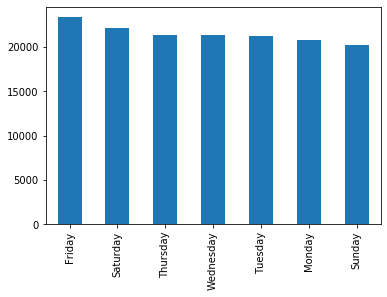

In [9]:
##barplot in MatPlotLib showing Days of the Week for Crime
SanFranCrime['DayOfWeek'].value_counts().plot(kind='bar');

The most common day crime is committed in San Francisco is Friday, while the least common day is Sunday.

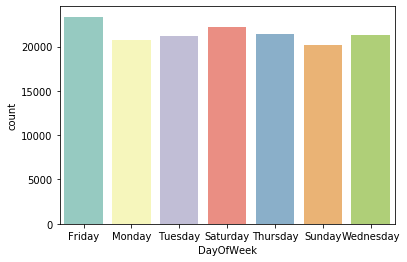

In [10]:
##seaborn viz, crimes by Day of the Week
ax = sns.countplot(x="DayOfWeek", data=SanFranCrime, palette="Set3");

Seaborn does not order the columns like Matplotlib in size order. Again here we see the most common day of crimes being committed is Friday and the least is Sunday.

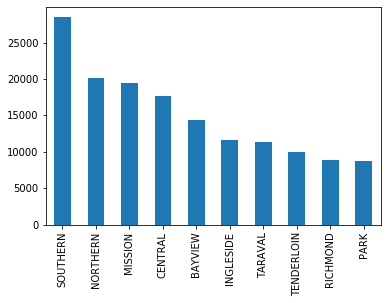

In [12]:
##matplotlib viz, crimes by district.
SanFranCrime['PdDistrict'].value_counts().plot(kind='bar');

This breaks down the crimes in San Francisco by town district. According to this bar graph, the Southern District of San Fransisco is where the most crimes happen, followed by the Northern, then the Mission District, and so on. 

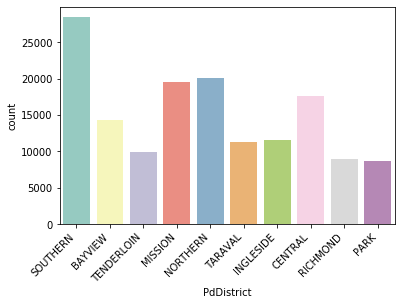

In [13]:
##seaborn viz, crimes by District.
ax = sns.countplot(x="PdDistrict", data=SanFranCrime, palette="Set3");

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

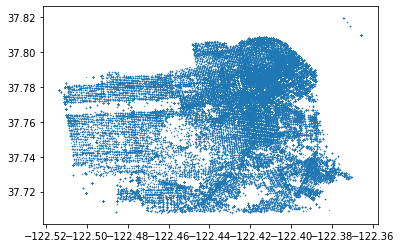

<Figure size 28800x21600 with 0 Axes>

In [16]:
##Matplotlib scatterplot heat map of crime
plt.scatter(x=SanFranCrime['X'], y=SanFranCrime['Y'], s=.1);
plt.figure(figsize=(400,300))
plt.show();

Here we can clearly see the density of crime that happens in the city. The western portion of the city looks to be better off than the eastern parts. North and south of the eastside look to show a lot of crime like the previous visualizations have shown.

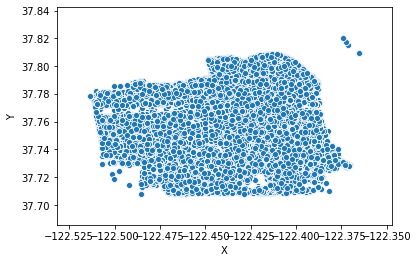

In [22]:
##seaborn visualization for location coordinates of crime.
ax = sns.scatterplot(x="X", y="Y", data=SanFranCrime)

This seaborn scatterplot shows less detail than its matplotlib counterpart particularly in the sense that it shows 
a smaller portion of San Francisco than Matplotlib.

Conclusion: After making sense of the data and visualizations, I can say that the Park District of San Francisco during the beginning of the week (Sunday/Monday) in the day time is the safest place and time to be. The scatterplots of coordinates show how low amounts of crime happen near San Francisco's Golden Gate Park District, (perhaps because it is a highly patrolled area)

